In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from time import time

read_beers = pd.read_csv("sub_dataset/5_beers.csv")
read_beers = read_beers[["brewery_name", 
            "review_overall", 
            "review_aroma", 
            "review_appearance", 
            "beer_style", 
            "review_palate",
            "review_taste",
            "beer_name",
            "beer_abv"]]

#print read[:10]
reviews_beers = read_beers.as_matrix()


read_beweries = pd.read_csv("sub_dataset/5_breweries.csv")
read_beweries = read_beweries[["brewery_name", 
            "review_overall", 
            "review_aroma", 
            "review_appearance", 
            "beer_style", 
            "review_palate",
            "review_taste",
            "beer_name",
            "beer_abv"]]

#print read[:10]
reviews_beweries = read_beweries.as_matrix()

print reviews_beers[:10]
print reviews_beweries[:10]

[['Caldera Brewing Company' 4.0 4.0 4.0 'American IPA' 4.0 4.5
  'Caldera IPA' 6.1]
 ['Caldera Brewing Company' 4.0 4.0 4.0 'American IPA' 4.0 4.5
  'Caldera IPA' 6.1]
 ['Caldera Brewing Company' 4.0 4.0 4.0 'American IPA' 4.0 4.0
  'Caldera IPA' 6.1]
 ['Caldera Brewing Company' 4.0 4.0 4.0 'American IPA' 4.0 3.5
  'Caldera IPA' 6.1]
 ['Caldera Brewing Company' 4.5 4.0 4.0 'American IPA' 4.0 4.0
  'Caldera IPA' 6.1]
 ['Caldera Brewing Company' 4.5 4.5 4.0 'American IPA' 4.0 4.0
  'Caldera IPA' 6.1]
 ['Caldera Brewing Company' 3.5 4.0 4.5 'American IPA' 3.5 3.5
  'Caldera IPA' 6.1]
 ['Caldera Brewing Company' 4.5 4.5 4.0 'American IPA' 4.0 4.5
  'Caldera IPA' 6.1]
 ['Caldera Brewing Company' 4.5 4.0 4.0 'American IPA' 4.0 4.5
  'Caldera IPA' 6.1]
 ['Caldera Brewing Company' 4.0 3.5 4.0 'American IPA' 4.0 4.5
  'Caldera IPA' 6.1]]
[['Caldera Brewing Company' 4.0 4.5 4.0 'American Double / Imperial IPA'
  4.0 4.5 'Cauldron DIPA' 7.7]
 ['Caldera Brewing Company' 3.0 3.5 3.5 'Herbed / Spice

In [27]:
#reducción de dimensionalidad con PCA
from sklearn.decomposition import PCA

#print reviews[:int(100),[1,2,3,5,6,8]]

pca = PCA(n_components=2)
pca.fit(reviews_beers[:int(100),[1,2,3,5,6,8]])
beers = pca.transform(reviews_beers[:int(100),[1,2,3,5,6,8]])

pca.fit(reviews_beweries[:int(100),[1,2,3,5,6,8]])
beweries = pca.transform(reviews_beweries[:int(100),[1,2,3,5,6,8]])

data = [beers, beweries]

In [44]:
print beers[:10]
print beweries[:10]
print data[:10]

[[-0.18099745  0.32952746]
 [-0.18099745  0.32952746]
 [ 0.06506627  0.03182343]
 [ 0.31113    -0.2658806 ]
 [-0.20151567  0.04210879]
 [-0.46935321 -0.1478308 ]
 [ 0.60503016 -0.73212642]
 [-0.71541693  0.14987323]
 [-0.44757939  0.33981282]
 [ 0.08684009  0.51946706]]
[[-1.58976971  0.20285081]
 [ 2.00905813  0.43418867]
 [ 1.56716088 -0.41481248]
 [ 2.56676194  1.09429381]
 [ 1.73342619 -0.34457547]
 [ 1.24612073 -1.39551104]
 [ 0.65108319 -1.75428544]
 [ 1.33722903 -0.76915605]
 [ 1.68417861  0.19193404]
 [ 1.61045808 -0.00735535]]
[array([[ -1.80997448e-01,   3.29527464e-01],
       [ -1.80997448e-01,   3.29527464e-01],
       [  6.50662746e-02,   3.18234338e-02],
       [  3.11129997e-01,  -2.65880597e-01],
       [ -2.01515669e-01,   4.21087924e-02],
       [ -4.69353206e-01,  -1.47830802e-01],
       [  6.05030161e-01,  -7.32126418e-01],
       [ -7.15416929e-01,   1.49873228e-01],
       [ -4.47579392e-01,   3.39812823e-01],
       [  8.68400885e-02,   5.19467059e-01],
       

Tiempo promedio:  0.00147418181101 [s]


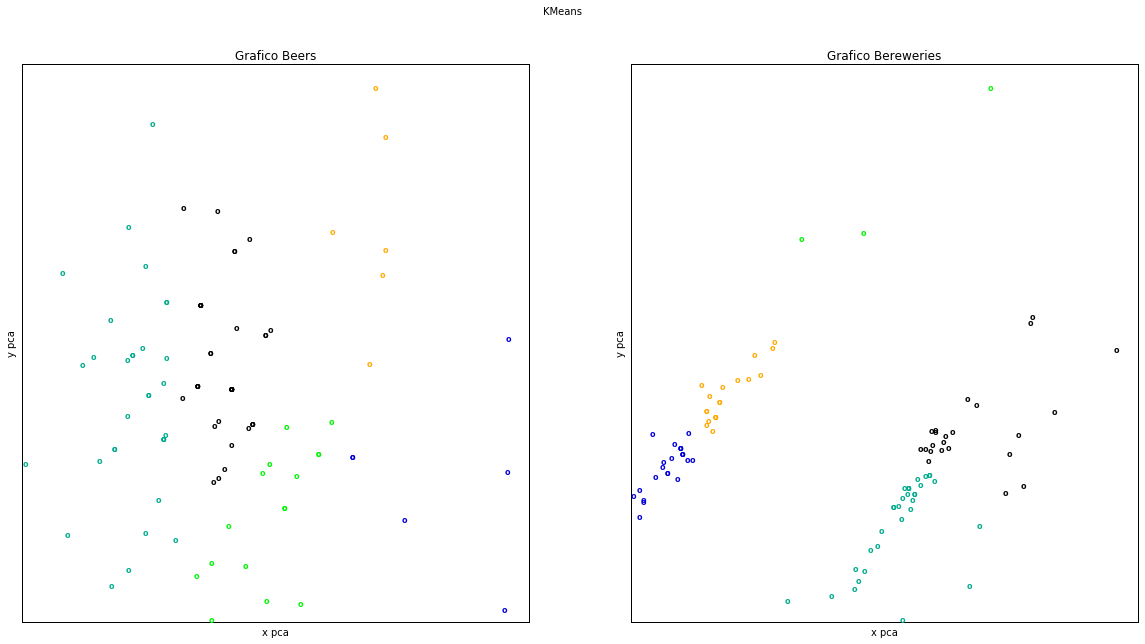

In [37]:
#K-means for beers
from sklearn.cluster import KMeans

titles = ["Beers", "Bereweries"]
tiempo = 0

#Vizualitation
fig = plt.figure(figsize = (20,10))
fig.suptitle('KMeans')

for X,i in zip(data, range(2)):
    start_time = time()

    k_means = KMeans(init="k-means++", n_clusters = 5, n_init = 2)#, tol=0.0001, max_iter=30) 5 
    k_means.fit(X)

    final_time = time() - start_time
    tiempo += final_time
    k_means_labels = k_means.labels_

    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)

    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")
    plt.title("Grafico " + titles[i])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0, 1.05, 0, 1.05])

    #Visualitation (in 2D).
    for j in range(X.shape[0]):
        plt.text(X[j,0], X[j,1], "o",
        color=plt.cm.spectral(k_means_labels[j]/5.1),
        fontdict={'weight': 'bold', 'size': 8})

print "Tiempo promedio: ", tiempo/6,"[s]"
plt.show()

Tiempo promedio:  0.00732962290446 [s]


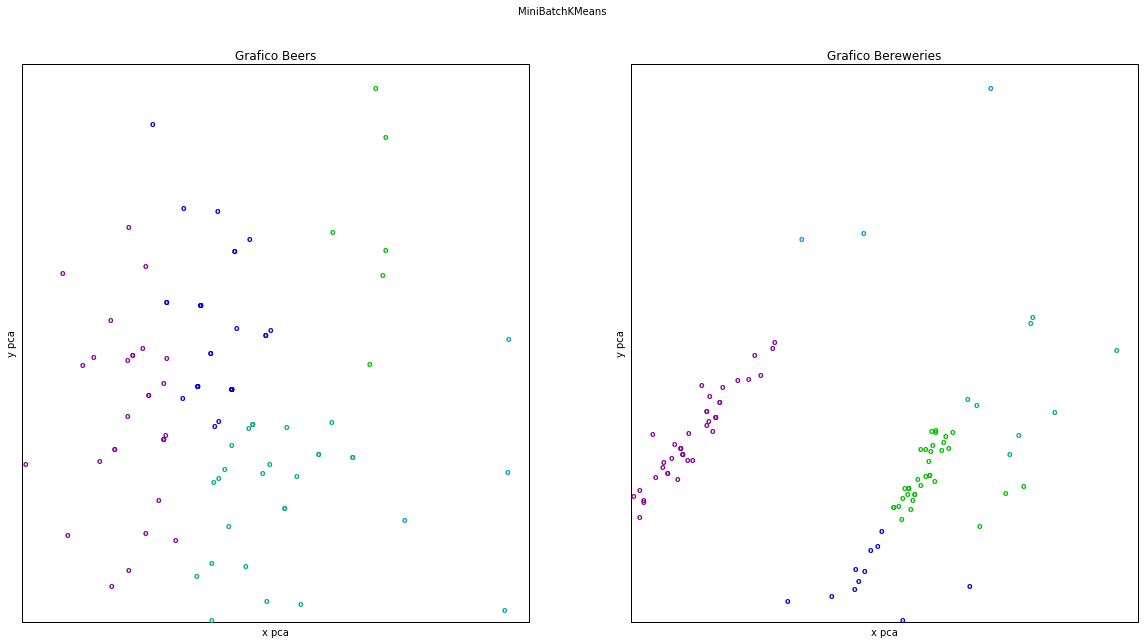

In [38]:
#Minibatch k-means 
from sklearn.cluster import MiniBatchKMeans

tiempo = 0
#Vizualitation
fig = plt.figure(figsize = (20,10))
fig.suptitle('MiniBatchKMeans')

#Running K-Means
for X,i in zip(data, range(2)):
    start_time = time()
    #print X
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=5, n_init=10)#, max_no_improvement=20, batch_size=50, reassignment_ratio=0.2)
    mbk.fit(X)
    
    final_time = time() - start_time
    tiempo += final_time
    mbk_labels = mbk.labels_

    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)
    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")
    plt.title("Grafico " + titles[i] )
    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0, 1.05, 0, 1.05])

    for j in range(X.shape[0]):
        plt.text(X[j,0], X[j,1], "o",
        color=plt.cm.spectral(mbk_labels[j]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})


print "Tiempo promedio: ", tiempo/6,"[s]"
plt.show()

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Tiempo de ejecucion: 0.000850915908813 [s]


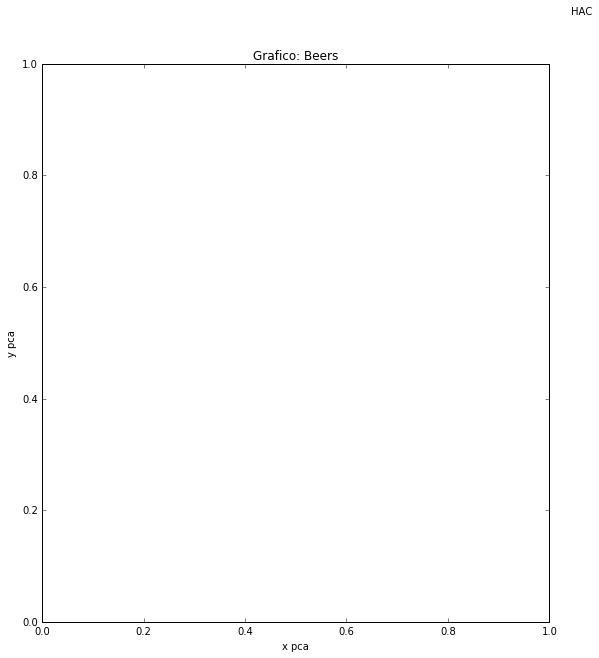

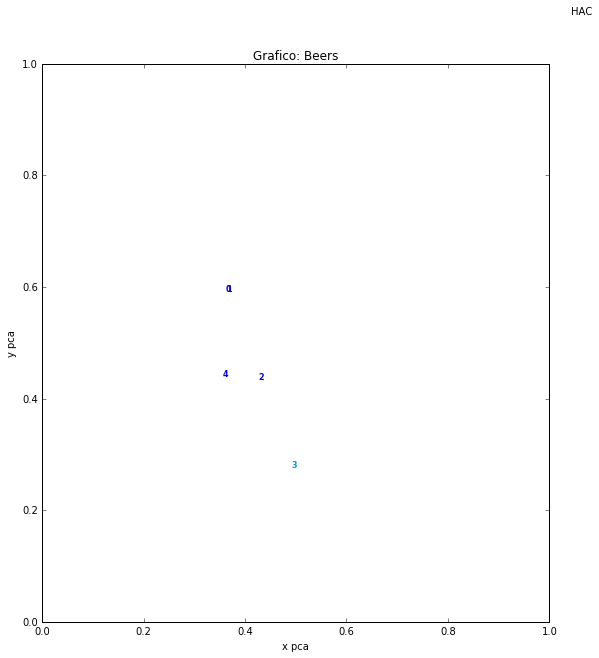

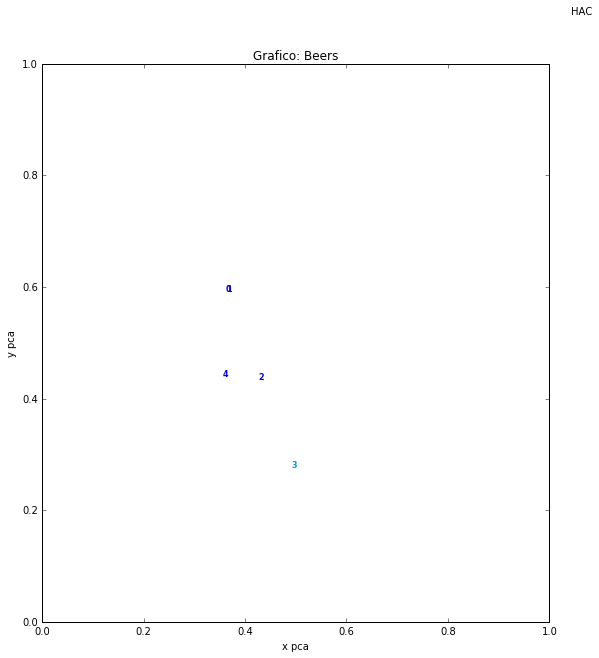

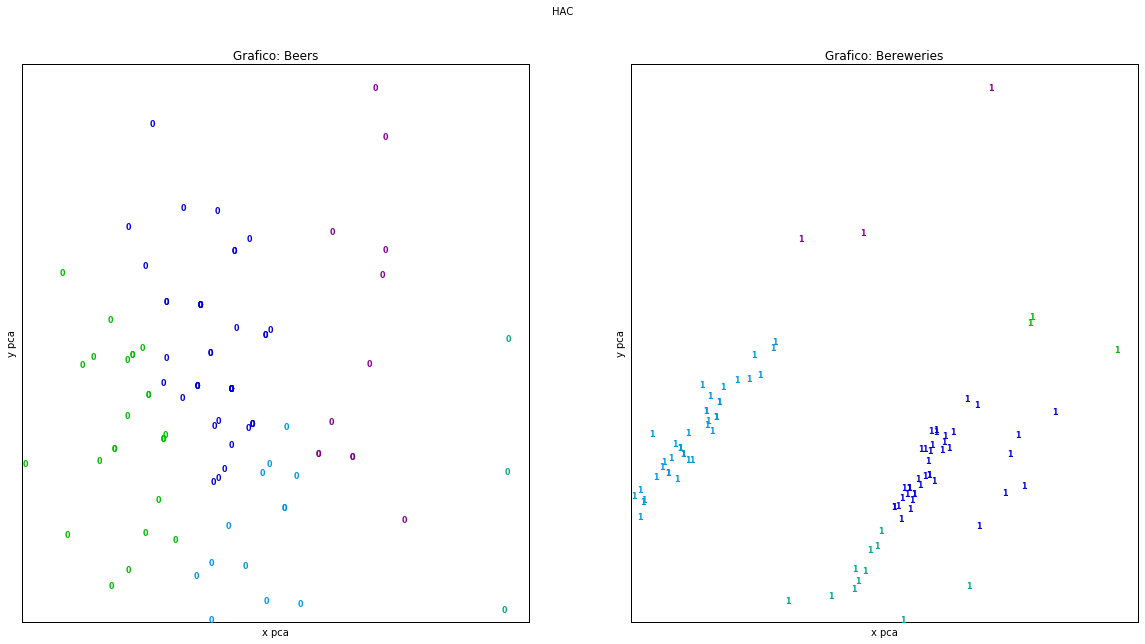

In [48]:
#HAC
from sklearn.cluster import AgglomerativeClustering as hac

fig = plt.figure(figsize = (20,10))
fig.suptitle('HAC')
y=range(5)
print y
tiempo=[]
j=0
for X,i in zip(data,range(2)):
    #Agglomerative Clustering
    start_time = time()	
    clustering = hac(linkage = "complete", n_clusters = 5, affinity="euclidean")
    clustering.fit(X)

    final_time = time() - start_time
    tiempo.append(final_time)

    HAC_labels = clustering.labels_

    #Normalization
    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)
    
    #Visualitation
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")

    plt.title( 'Grafico: ' + titles[i] )

    
    for i in range(X.shape[0]):
        plt.text(X[i,0], X[i,1], str(y[j]),
        color=plt.cm.spectral(clustering.labels_[i]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})
    j = j+1

    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0,1.05,0,1.05])

print "Tiempo de ejecucion:", np.median(tiempo),"[s]"
plt.show()